<a href="https://colab.research.google.com/github/jass2422/Digit-Recognizer/blob/main/scratchpad_lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
torch.tensor(1.0)

tensor(1.)

In [6]:
import torch

In [7]:
x= torch.tensor(183.0 , requires_grad=False)
x

tensor(183.)

In [11]:
w= torch.tensor(.780 , requires_grad= True)
w

tensor(0.7800, requires_grad=True)

In [12]:
y_hat = w*x
y_hat

tensor(142.7400, grad_fn=<MulBackward0>)

In [13]:
y=40.8
absolute_error = torch.abs(y-y_hat)
absolute_error

tensor(101.9400, grad_fn=<AbsBackward0>)

In [14]:
absolute_error.backward()


In [15]:
w.grad

tensor(183.)

In [16]:
import torchvision

In [18]:
raw_train_dataset = torchvision.datasets.MNIST(root='data', train=True, download=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 471kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.39MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.84MB/s]


In [20]:
raw_train_dataset[0][0]

In [57]:
raw_train_dataset.__getitem__(0)

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [19]:
raw_train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [21]:
import matplotlib.pyplot as plt

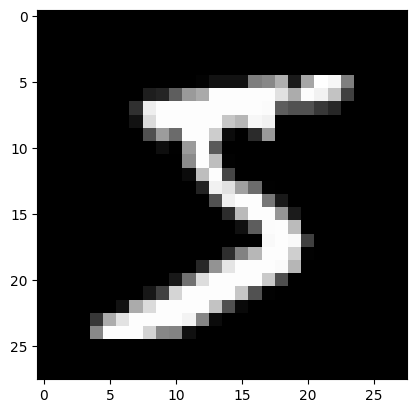

In [31]:
plt.imshow(raw_train_dataset[0][0], cmap="gray")
plt.show()

In [27]:
# Check if GPU is available
import torch
print("GPU Available: ", torch.cuda.is_available())
print("GPU Type: ", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

GPU Available:  False
GPU Type:  No GPU


In [32]:
import numpy as np
np.array(raw_train_dataset[0][0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [33]:
np.exp(np.array(raw_train_dataset[0][0]))

<ipython-input-33-8c680ee878fe>:1: RuntimeWarning: overflow encountered in exp
  np.exp(np.array(raw_train_dataset[0][0]))


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
      

In [104]:
np.exp(np.array(raw_train_dataset[0][0]))/255.0

<ipython-input-104-dca9bbf07c4f>:1: RuntimeWarning: overflow encountered in exp
  np.exp(np.array(raw_train_dataset[0][0]))/255.0


array([[3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03],
       [3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03],
       [3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
        3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03, 3.922e-03,
      

In [84]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jass2422/Digit-Recognizer/refs/heads/main/first_five_mnist.csv', index_col="Unnamed: 0")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
class MNISTDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels=True, transform=None):
        # Use the 'data' argument instead of 'dataframe'
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if self.labels:
            # Select elements from index 1 to 785 (exclusive) to get 784 values
            image = self.data.iloc[idx, 1:].values.astype(np.float32)[:784].reshape(28, 28)
            label = self.data.iloc[idx, 0]

        else:
            image = self.data.iloc[idx, 1:].values.astype(np.float32).reshape(28, 28)
            label = None  # Or assign a default value

        if self.transform is not None:  # Correct the typo here: transforms -> transform
            image = self.transform(image)
        return image, label

In [86]:
len(df)

5

In [87]:
df.iloc[0,0]

np.int64(1)

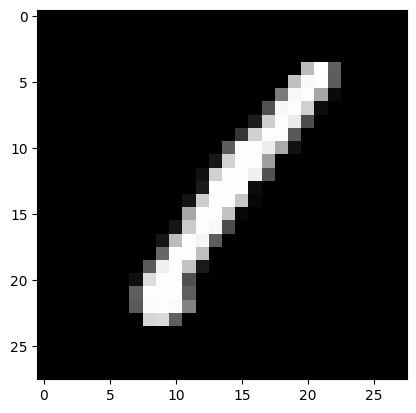

In [97]:
plt.imshow(df.iloc[0, 1:].values.reshape(28, 28), cmap="gray");
plt.show()

In [99]:
df.iloc[0, 1:].values.astype(np.float32);

In [100]:
import  torchvision.transforms.v2 as transforms
import torchvision.transforms.v2 as transforms
import torch

transform = transforms.Compose([
    transforms.ToImage(), transforms.ToDtype(torch.float32), transforms.Resize(size=256)
])

In [101]:
np_array = df.iloc[0, 1:].values.reshape(28, 28)  # Select first 784 elements to reshape
np_array.shape

(28, 28)

In [102]:
sample_mnist_dataset = MNISTDataset(df , labels = True , transform = transform)
first_image , first_lable = sample_mnist_dataset[0]
first_image.shape , first_lable

(torch.Size([1, 256, 256]), np.int64(1))

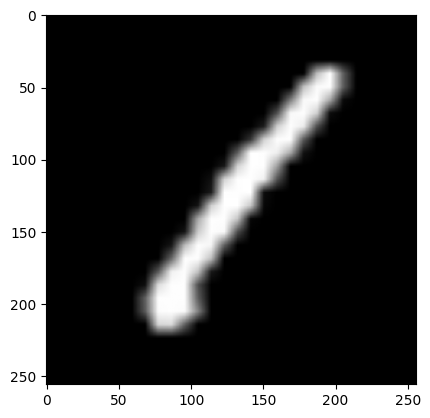

In [103]:
plt.imshow(first_image.squeeze(), cmap="gray");
plt.show()